In [205]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import torch
import scipy
import sklearn

In [206]:
complaints_path = kagglehub.dataset_download("adelanseur/insurance-company-complaints")
print(complaints_path)

C:\Users\adhit\.cache\kagglehub\datasets\adelanseur\insurance-company-complaints\versions\1


C:\Users\adhit\AppData\Local\Temp\ipykernel_11156\1464091969.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = complaints_df[complaints_df['Coverage'] == 'Individual Life'][complaints_df['Recovery'] > 0]


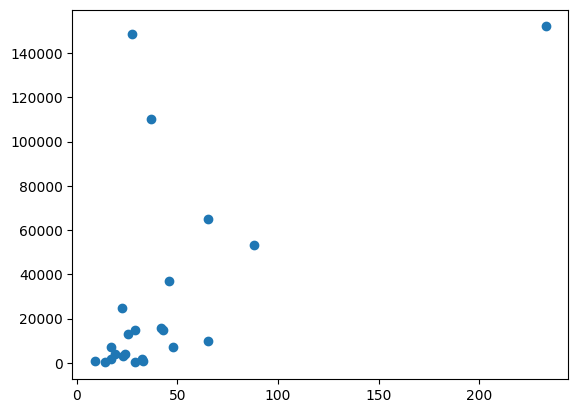

In [207]:
complaints_df = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')
# print(complaints_df.head())

df = complaints_df[complaints_df['Coverage'] == 'Individual Life'][complaints_df['Recovery'] > 0]
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['duration'] = df['Closed'] - df['Opened']
df['duration_seconds'] = df['duration'].dt.total_seconds()
df['duration_minutes'] = df['duration'].dt.total_seconds() / 60
df['duration_days'] = df['duration'].dt.days
grouped = df.groupby('Company')

avg_recovery = grouped['Recovery'].mean().to_dict()
avg_duration = grouped['duration_days'].mean().to_dict()

fig, ax = plt.subplots()
ax.scatter(avg_duration.values(), avg_recovery.values())
# for company in avg_recovery:
#     ax.annotate(company, (avg_recovery[company], avg_duration[company]))


In [208]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

epoch 0, loss 3241.773681640625
epoch 1, loss 3236.195556640625
epoch 2, loss 3230.624755859375
epoch 3, loss 3225.0625
epoch 4, loss 3219.508544921875
epoch 5, loss 3213.962646484375
epoch 6, loss 3208.425537109375
epoch 7, loss 3202.8974609375
epoch 8, loss 3197.37744140625
epoch 9, loss 3191.8671875
epoch 10, loss 3186.365478515625
epoch 11, loss 3180.873046875
epoch 12, loss 3175.390869140625
epoch 13, loss 3169.916748046875
epoch 14, loss 3164.4521484375
epoch 15, loss 3158.998046875
epoch 16, loss 3153.55322265625
epoch 17, loss 3148.1181640625
epoch 18, loss 3142.69287109375
epoch 19, loss 3137.27783203125
epoch 20, loss 3131.87255859375
epoch 21, loss 3126.478271484375
epoch 22, loss 3121.09375
epoch 23, loss 3115.719482421875
epoch 24, loss 3110.355224609375
epoch 25, loss 3105.001708984375
epoch 26, loss 3099.65869140625
epoch 27, loss 3094.326171875
epoch 28, loss 3089.00439453125
epoch 29, loss 3083.69287109375
epoch 30, loss 3078.392578125
epoch 31, loss 3073.10302734375
e

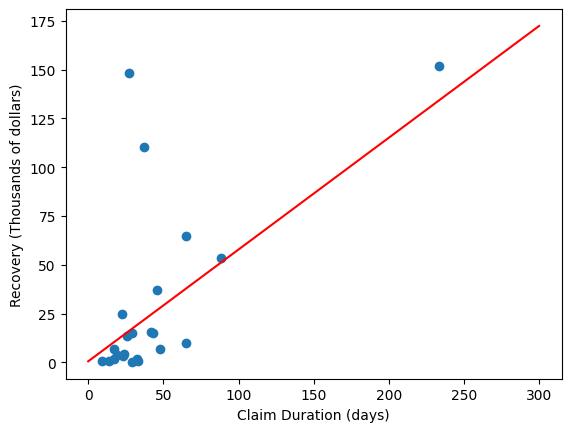

In [209]:
model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X = torch.from_numpy(np.float32(grouped['duration_days'].mean().to_numpy().reshape((-1, 1))))
Y = torch.from_numpy(np.float32(grouped['Recovery'].mean().to_numpy().reshape((-1, 1)))) / 1000

for epoch in range(1000):
    pred_y = model(X)
    loss = criterion(pred_y, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

with torch.no_grad():
    pred_in = torch.from_numpy(np.float32(np.arange(0, 300, 0.1).reshape((-1, 1))))
    pred_out = model(pred_in).data
    print('Weights:', list(model.parameters()))
    fig, ax = plt.subplots()
    ax.scatter(x=X.detach().numpy().reshape((-1)), y=Y.detach().numpy().reshape((-1)))
    ax.set_xlabel('Claim Duration (days)')
    ax.set_ylabel('Recovery (Thousands of dollars)')
    ax.add_line(plt.Line2D(pred_in.detach().numpy().reshape(-1), pred_out.numpy().reshape(-1), color='red'))

Slope: 629.4341968469366
Intercept: 2979.074601206663
R-squared: 0.38563939902865324
P-value: 0.001565518168741658
Standard Error: 173.36509680443834


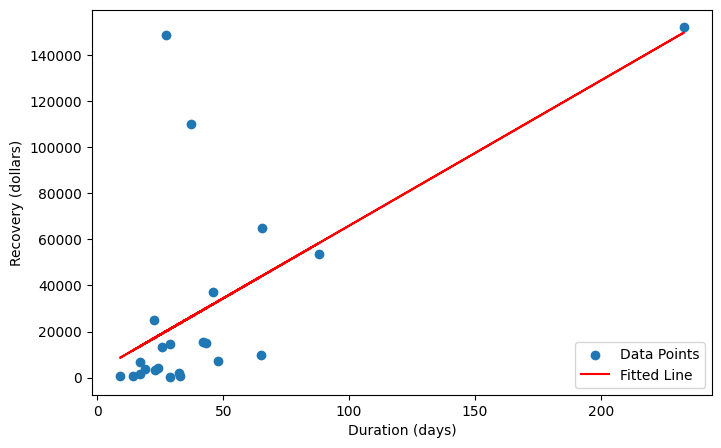

In [210]:
import sklearn.linear_model


X = grouped['duration_days'].mean().to_numpy()
Y = grouped['Recovery'].mean().to_numpy()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

predicted_Y = slope * X + intercept

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Data Points')
plt.plot(X, predicted_Y, color='red', label='Fitted Line')
plt.xlabel('Duration (days)')
plt.ylabel('Recovery (dollars)')
plt.legend()
plt.show()

Weights: [[629.43419685]]
Intercecpt: [2979.07460121]
R-squared: 0.3856393990286534


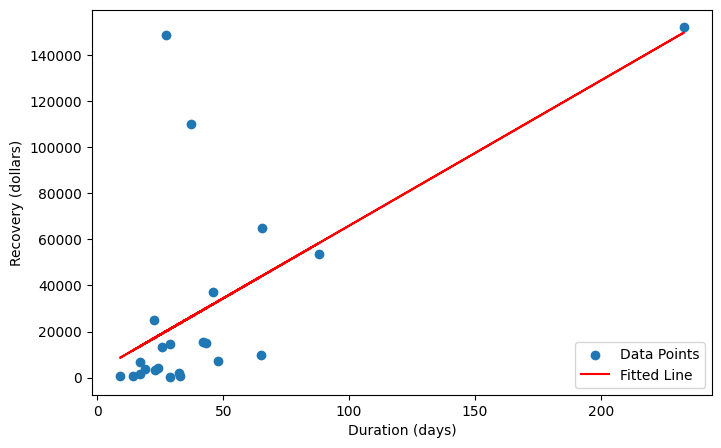

In [211]:
X = grouped['duration_days'].mean().to_numpy().reshape(-1, 1)
Y = grouped['Recovery'].mean().to_numpy().reshape(-1, 1)

linear = sklearn.linear_model.LinearRegression().fit(X, Y)

print(f"Weights: {linear.coef_}")
print(f"Intercecpt: {linear.intercept_}")
print(f"R-squared: {linear.score(X, Y)}")

predicted_Y = slope * X + intercept

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Data Points')
plt.plot(X, predicted_Y, color='red', label='Fitted Line')
plt.xlabel('Duration (days)')
plt.ylabel('Recovery (dollars)')
plt.legend()
plt.show()